# Mapa auto-organizável - Base de créditos

Base de dados - https://archive.ics.uci.edu/dataset/109/wine

## Importando bibliotecas

In [1]:
!pip install -q minisom

In [2]:
# Importacao desta lib para desativar erro no TensorFlow
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
import minisom 
import pandas as pd
import numpy as np
import matplotlib 
import sklearn

In [4]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot

## Carregamento base de dados

In [5]:
base = pd.read_csv('credit_data.csv')
base

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


## Tratamento da base 

In [6]:
base.isna().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [7]:
base = base.dropna()

In [8]:
base.isna().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [9]:
## IDADE NEGATIVA
base.loc[base['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [10]:
base.loc[base['age'] > 0].mean()

clientid     1003.431795
income      45328.856915
age            40.927700
loan         4443.240892
default         0.141926
dtype: float64

In [11]:
base.loc[base['age'] < 0, 'age'] = 40.92

In [12]:
base.loc[base['age'] < 0]

,clientid,income,age,loan,default


## Divisão da base em previsores (X) e alvo (y)

In [13]:
X = base.iloc[:,0:4].values
y = base.iloc[:,4].values

In [14]:
X

array([[1.00000000e+00, 6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [2.00000000e+00, 3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [3.00000000e+00, 5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [1.99800000e+03, 4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [1.99900000e+03, 4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [2.00000000e+03, 6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [15]:
y

array([0, 0, 0, ..., 1, 0, 0])

## Normalização dos dados - escalonamento

In [16]:
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)
X

array([[0.00000000e+00, 9.23175898e-01, 8.92091749e-01, 5.88837391e-01],
       [5.00250125e-04, 2.88121646e-01, 6.54707879e-01, 4.76826954e-01],
       [1.00050025e-03, 7.46334292e-01, 9.81188803e-01, 5.82620111e-01],
       ...,
       [9.98999500e-01, 4.86122016e-01, 2.16958067e-01, 4.01128949e-01],
       [9.99499750e-01, 4.75009983e-01, 1.00000000e+00, 1.17790295e-01],
       [1.00000000e+00, 9.88813673e-01, 8.29709134e-01, 5.35970280e-01]])

## Criação do mapa auto organizável

In [17]:
X.shape

(1997, 4)

In [18]:
som = MiniSom(x = 15, y = 15, input_len = 4, random_seed = 0)

In [19]:
som.random_weights_init(X)

In [26]:
som.train_random(data=X,num_iteration=100)

## Visualização dos resultados

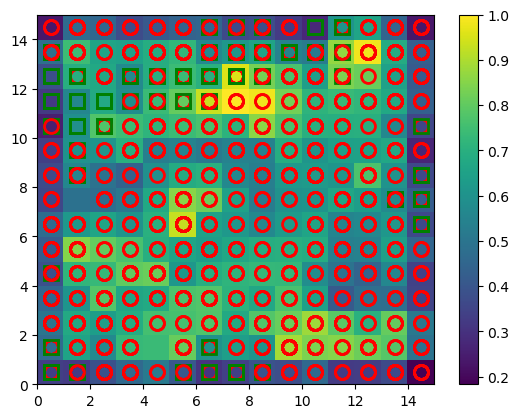

In [27]:
pcolor(som.distance_map().T)
colorbar()

markers = ['o','s']
colors = ['r','g']

for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor='None', markersize=10, markeredgecolor= colors[y[i]], markeredgewidth = 2)

## Detecção de registros que podem ser outliers - fraudes

In [28]:
mapeamento = som.win_map(X)
mapeamento

defaultdict(list,
            {(7, 9): [array([0.        , 0.9231759 , 0.89209175, 0.58883739]),
              array([0.0010005 , 0.74633429, 0.9811888 , 0.58262011]),
              array([0.00550275, 0.78874378, 0.92377791, 0.6722184 ]),
              array([0.01450725, 0.7768602 , 0.79395585, 0.78968884]),
              array([0.04502251, 0.88555995, 0.94488088, 0.54622831]),
              array([0.07503752, 0.99168174, 0.86463389, 0.78947487]),
              array([0.08554277, 0.80955934, 0.92225712, 0.77810223]),
              array([0.10305153, 0.92719604, 0.94670889, 0.77910362]),
              array([0.11705853, 0.78159345, 0.88384455, 0.75008768]),
              array([0.16908454, 0.89293298, 0.88825091, 0.71536704]),
              array([0.22061031, 0.81860152, 0.91477989, 0.80965936])],
             (13,
              9): [array([5.00250125e-04, 2.88121646e-01, 6.54707879e-01, 4.76826954e-01]), array([0.00150075, 0.45407166, 0.60319752, 0.44332796]), array([0.01850925, 0.2490

In [35]:
suspeitos = np.concatenate((mapeamento[(5,4)],mapeamento[(6,13)]),axis=0)
suspeitos

array([[0.68534267, 0.7859206 , 0.72511043, 0.03576814],
       [0.70635318, 0.75291822, 0.97602072, 0.10542319],
       [0.71935968, 0.76077485, 0.78287441, 0.03900222],
       [0.72286143, 0.67182513, 0.97634874, 0.10365749],
       [0.7943972 , 0.84629404, 0.93347744, 0.06715873],
       [0.84442221, 0.78918109, 0.83575395, 0.10984278],
       [0.85692846, 0.66470005, 0.86847496, 0.05101643],
       [0.87693847, 0.84043564, 0.84061847, 0.00819723],
       [0.62631316, 0.41845726, 0.04790026, 0.17079297],
       [0.64182091, 0.42025924, 0.11322841, 0.21827246],
       [0.66133067, 0.39971492, 0.06035924, 0.36309066],
       [0.72536268, 0.38363339, 0.09460458, 0.25745504],
       [0.73536768, 0.36699858, 0.16314619, 0.18504153],
       [0.73586793, 0.46301044, 0.21324847, 0.17520461],
       [0.73986993, 0.36831041, 0.24291714, 0.26700166],
       [0.74887444, 0.28122805, 0.20120962, 0.10173197],
       [0.76138069, 0.32247804, 0.01433346, 0.21853186],
       [0.76438219, 0.22250604,

In [36]:
suspeitos = normalizador.inverse_transform(suspeitos)
suspeitos

array([[1.37100000e+03, 5.92957411e+04, 5.13497995e+01, 4.93714430e+02],
       [1.41300000e+03, 5.76462429e+04, 6.28707485e+01, 1.45249338e+03],
       [1.43900000e+03, 5.80389262e+04, 5.40021256e+01, 5.38230523e+02],
       [1.44600000e+03, 5.35931132e+04, 6.28858100e+01, 1.42818921e+03],
       [1.58900000e+03, 6.23132776e+04, 6.09173057e+01, 9.25795592e+02],
       [1.68900000e+03, 5.94587043e+04, 5.64301746e+01, 1.51332764e+03],
       [1.71400000e+03, 5.32369930e+04, 5.79326122e+01, 7.03602198e+02],
       [1.75400000e+03, 6.20204681e+04, 5.66535365e+01, 1.14209888e+02],
       [1.25300000e+03, 4.09294839e+04, 2.02546060e+01, 2.35228712e+03],
       [1.28400000e+03, 4.10195488e+04, 2.32542530e+01, 3.00582686e+03],
       [1.32300000e+03, 3.99927191e+04, 2.08266799e+01, 4.99920201e+03],
       [1.45100000e+03, 3.91889453e+04, 2.23991098e+01, 3.54516225e+03],
       [1.47100000e+03, 3.83575175e+04, 2.55463078e+01, 2.54841392e+03],
       [1.47200000e+03, 4.31563053e+04, 2.78468347e

In [37]:
classe = []
for i in range(len(base)):
    for j in range(len(suspeitos)):
        if base.iloc[i,0] == int(round(suspeitos[j,0])):
            classe.append(base.iloc[i,4])
classe = np.asarray(classe)

classe, classe.shape

(array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 (24,))

In [38]:
suspeito_final = np.column_stack((suspeitos,classe))
suspeito_final

array([[1.37100000e+03, 5.92957411e+04, 5.13497995e+01, 4.93714430e+02,
        0.00000000e+00],
       [1.41300000e+03, 5.76462429e+04, 6.28707485e+01, 1.45249338e+03,
        0.00000000e+00],
       [1.43900000e+03, 5.80389262e+04, 5.40021256e+01, 5.38230523e+02,
        1.00000000e+00],
       [1.44600000e+03, 5.35931132e+04, 6.28858100e+01, 1.42818921e+03,
        0.00000000e+00],
       [1.58900000e+03, 6.23132776e+04, 6.09173057e+01, 9.25795592e+02,
        0.00000000e+00],
       [1.68900000e+03, 5.94587043e+04, 5.64301746e+01, 1.51332764e+03,
        0.00000000e+00],
       [1.71400000e+03, 5.32369930e+04, 5.79326122e+01, 7.03602198e+02,
        0.00000000e+00],
       [1.75400000e+03, 6.20204681e+04, 5.66535365e+01, 1.14209888e+02,
        0.00000000e+00],
       [1.25300000e+03, 4.09294839e+04, 2.02546060e+01, 2.35228712e+03,
        0.00000000e+00],
       [1.28400000e+03, 4.10195488e+04, 2.32542530e+01, 3.00582686e+03,
        0.00000000e+00],
       [1.32300000e+03, 3.9992

In [39]:
suspeitos_final = suspeito_final[suspeito_final[:,4].argsort()]
suspeitos_final

array([[1.37100000e+03, 5.92957411e+04, 5.13497995e+01, 4.93714430e+02,
        0.00000000e+00],
       [1.69800000e+03, 3.97625266e+04, 2.56699499e+01, 3.80934716e+03,
        0.00000000e+00],
       [1.59400000e+03, 3.72614471e+04, 2.37183925e+01, 2.07551982e+03,
        0.00000000e+00],
       [1.57200000e+03, 4.07161909e+04, 2.58056516e+01, 2.38970076e+03,
        0.00000000e+00],
       [1.53500000e+03, 3.81601165e+04, 3.13281223e+01, 3.42990158e+03,
        0.00000000e+00],
       [1.52900000e+03, 3.11356077e+04, 1.90096707e+01, 2.45791369e+03,
        0.00000000e+00],
       [1.52300000e+03, 3.61323276e+04, 1.87133326e+01, 3.00939734e+03,
        0.00000000e+00],
       [1.49800000e+03, 3.40706040e+04, 2.72940516e+01, 1.40168506e+03,
        0.00000000e+00],
       [1.48000000e+03, 3.84230843e+04, 2.92091193e+01, 3.67656835e+03,
        0.00000000e+00],
       [1.47200000e+03, 4.31563053e+04, 2.78468347e+01, 2.41301191e+03,
        0.00000000e+00],
       [1.47100000e+03, 3.8357

In [40]:
suspeitos_final[:,0] = np.round(suspeito_final[:,0]).astype(int)
suspeitos_final[:,0]

array([1371., 1413., 1439., 1446., 1589., 1689., 1714., 1754., 1253.,
       1284., 1323., 1451., 1471., 1472., 1480., 1498., 1523., 1529.,
       1535., 1572., 1594., 1698., 1747., 1789.])